# Capstone Project (Taqdeerat Dataset) - The Victors Team - EDA
### Project Description:
<h4><Strong> a machine learning project that uses past vehicle damage assessments to predict future vehicle damage assessments according to car information.</Strong></h4>

### Team Members:
<br>
<li><Strong> Saad BinOnayq</Strong></li>
<li><Strong> Nawaf Alrubayyi</Strong></li>
<li><Strong> Mashhor Al-Bakr</Strong></li>
<li><Strong> Mohammed Alkathiri</Strong></li>
<li><Strong> Sami Asiri</Strong></li>
<li><Strong> Waleed Almaslokhi</Strong></li>


## Importing Packages 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import plotly.express as px 
import plotly.io as pio
pio.renderers.default = "notebook_connected"
pd.set_option('display.max_columns',None)    

## Loading Dataset 

In [2]:
df_old = pd.read_csv('en_Taqderat_V3.csv')
df = pd.read_csv('en_grouped_eda_19_18-6.csv')


- The dataset consists of information regarding Car parts in Saudi Arabia
- There are 253K rows & 23 columns
- Preprocessing of the data is required because there is too much data to deal with. Next step is to clean the data

In [3]:
df_normal = df[df['CarClass'] == 'Normal']
df_Luxury = df[df['CarClass'] == 'Luxury']

## Exploratory Data  Analysis

In [4]:
#Finding out the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253396 entries, 0 to 253395
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   c_id                  253396 non-null  int64  
 1   Area                  253396 non-null  object 
 2   RegistrationTime      253396 non-null  object 
 3   CloseTime             253396 non-null  object 
 4   CarBrand              253396 non-null  object 
 5   CarModel              253396 non-null  object 
 6   ManufactureYear       253396 non-null  int64  
 7   CarColor              253396 non-null  object 
 8   AssessmentCost        253396 non-null  int64  
 9   SparePartCost         253396 non-null  int64  
 10  TotalCost             253396 non-null  int64  
 11  PaymentType           253396 non-null  object 
 12  DurationTime          253396 non-null  int64  
 13  Hour                  253396 non-null  int64  
 14  Month                 253396 non-null  int64  
 15  

Here, we can see that there are no null values in our dataset. The 29 coulmns in our dataset are divided into 3 datatypes, Object , Int and Float.

In [5]:
#Finding out the shape of our dataset after removing outliers
print(df.shape)
print(df_old.shape)
print(df_normal.shape)
print(df_Luxury.shape)

(253396, 29)
(1037875, 20)
(235148, 29)
(18241, 29)


**Insights**
- The Data have 253K rows and 30 columns
- The old data have 1M row and 20 columns
- The Data have normal car class have 235K rows
- The Data have luxury car class have 18K rows

In [6]:
df.head()

,c_id,Area,RegistrationTime,CloseTime,CarBrand,CarModel,ManufactureYear,CarColor,AssessmentCost,SparePartCost,TotalCost,PaymentType,DurationTime,Hour,Month,Day,WeekDay,PartsList,PositionList,PartStateList,CarMade,CarClass,CarType,SparePart_Differace%,AssessmentEvaluation,PartsNumber,TimeEvaluation,PartOfDay,TotalCostEvaluation
0,51,Truck Center,2018-01-01 09:13:36.437000,2018-01-01 09:29:00,Volvo,head,2002,red,2455,1255,3710,POS,15,9,1,1,Monday,"['Decoration', 'Fender', 'Other', 'Taillight']","['front left', 'left', 'rear left']",['New'],Sweden,Luxury,Multi,95.617530,unacceptable,4,Acceptable,Morning,Low
1,54,Truck Center,2018-01-01 08:37:46.137000,2018-01-01 08:51:00,Volvo,head,2008,red,6510,5310,11820,POS,13,8,1,1,Monday,"['Bumper', 'Decoration', 'Other', 'Taillight']","['front right', 'right']",['New'],Sweden,Luxury,Multi,22.598870,Acceptable,4,Acceptable,Morning,Acceptable
2,94,Orouba,2018-01-01 10:17:57.727000,2018-01-01 10:25:00,BMW,Sedan,2012,white,5778,4778,10556,Insurance Company,7,10,1,1,Monday,['Bumper'],['rear'],['New'],Germany,Luxury,Car,20.929259,Acceptable,1,Fast,Morning,Acceptable
3,99,Orouba,2018-01-01 10:25:36.453000,2018-01-01 10:52:00,Hyundai,Genesis,2011,silver,1043,343,1386,POS,26,10,1,1,Monday,['Sensor'],['undefined'],['New'],Korea,Luxury,Multi,204.081633,unacceptable,1,Delay,Morning,Low
4,103,New Industrial,2018-01-01 10:42:32.120000,2018-01-01 10:56:00,Lexus,IS,2007,brouwn,1609,409,2019,Insurance Company,13,10,1,1,Monday,"['Bumper', 'Sensor']","['front', 'front right']",['New'],Japan,Luxury,Car,293.398533,unacceptable,2,Acceptable,Morning,Low


In [7]:
#Finding out useful information
df.describe()

,c_id,ManufactureYear,AssessmentCost,SparePartCost,TotalCost,DurationTime,Hour,Month,Day,SparePart_Differace%,PartsNumber
count,253396.000000,253396.000000,253396.000000,253396.000000,253396.000000,253396.000000,253396.000000,253396.000000,253396.000000,2.533960e+05,253396.000000
mean,126697.500000,2012.867310,4631.884276,2937.928594,7570.168065,20.287834,11.989641,6.202908,15.017490,inf,3.000817
std,73149.268743,4.520612,4523.678753,3985.014262,8482.414816,32.313333,3.267045,3.441870,8.972773,NaN,2.059653
min,0.000000,1967.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-5.067006e+01,1.000000
25%,63348.750000,2011.000000,2062.000000,799.000000,2861.000000,9.000000,9.000000,3.000000,7.000000,4.747211e+01,1.000000
50%,126697.500000,2014.000000,3421.000000,1796.000000,5202.000000,14.000000,11.000000,6.000000,14.000000,8.255934e+01,2.000000
75%,190046.250000,2016.000000,5757.000000,3708.000000,9442.000000,22.000000,14.000000,9.000000,23.000000,1.559252e+02,4.000000
max,253395.000000,2019.000000,304510.000000,300510.000000,605020.000000,1438.000000,23.000000,12.000000,31.000000,inf,18.000000


In [8]:
# Describe the catgroical data
df.describe(exclude='number')

,Area,RegistrationTime,CloseTime,CarBrand,CarModel,CarColor,PaymentType,WeekDay,PartsList,PositionList,PartStateList,CarMade,CarClass,CarType,AssessmentEvaluation,TimeEvaluation,PartOfDay,TotalCostEvaluation
count,253396,253396,253396,253396,253396,253396,253396,253396,253396,253396,253396,253396,253396,253396,253396,253396,253396,253396
unique,5,248878,110874,104,826,43,2,6,18451,467,3,19,3,3,5,3,4,5
top,New Industrial,2018-05-16 12:46:40.063000,2018-12-10 12:25:00,Toyota,Elantra,white,Insurance Company,Sunday,['Bumper'],['rear'],['New'],Japan,Normal,Multi,unacceptable,Acceptable,Morning,Acceptable
freq,76431,10,21,74543,25473,122458,201527,58697,30481,29388,210019,120042,235148,203201,116625,107939,133880,124650


### 1st plot insights

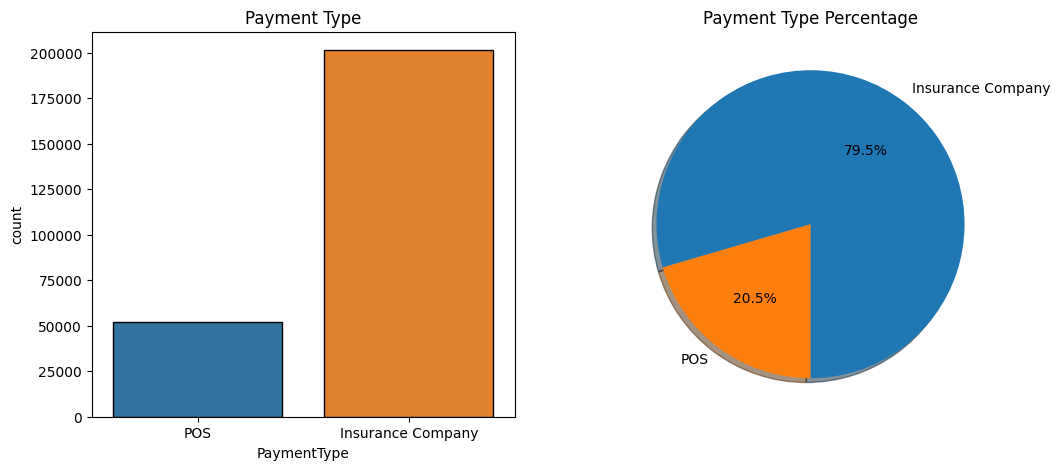

In [9]:
#Finding out the distribution of "PaymentType" through visualization
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='PaymentType',data=df,ec="Black")
plt.title("Payment Type")
plt.subplot(1,2,2)
labels =df['PaymentType'].value_counts(sort = True).index
sizes = df['PaymentType'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Payment Type Percentage',size = 12)
plt.show()

**Insights**
- There's a huge difference between the two payment types
- InsuranceCompany covered expenses for most of the people
- By looking at the given information, we understand that most of the people take benefit of Car Insurance Companies, whenever an accident occurs

### 2nd plot insights 

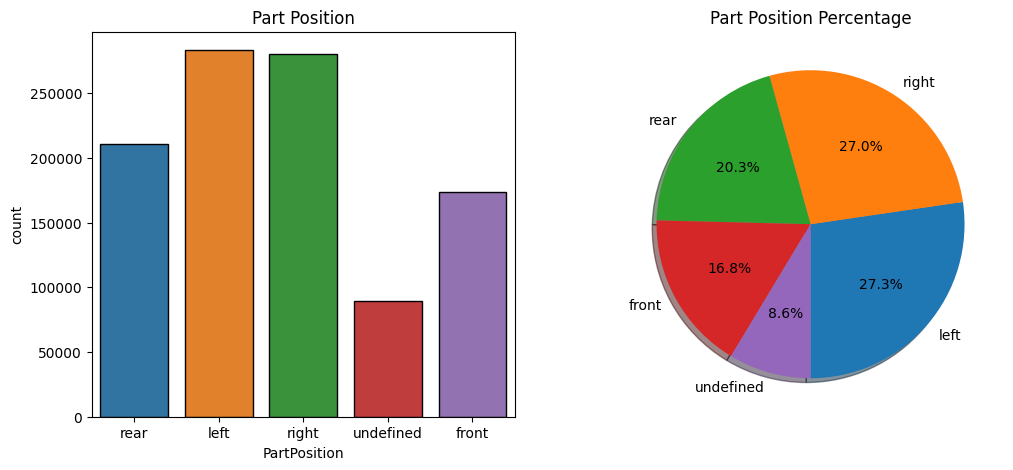

In [10]:
#Finding out the distribution of "PartPosition" through visualization

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='PartPosition',data=df_old,ec="Black")
plt.title("Part Position")
plt.subplot(1,2,2)
labels =df_old['PartPosition'].value_counts(sort = True).index
sizes = df_old['PartPosition'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Part Position Percentage',size = 12)
plt.show()

**Insights**
- Left and right parts are the most vulnerable postions of the car whenever an accident takes place
- Whereas, the front part of the car is the least likely postion to get damaged

### 3rd plot insights 

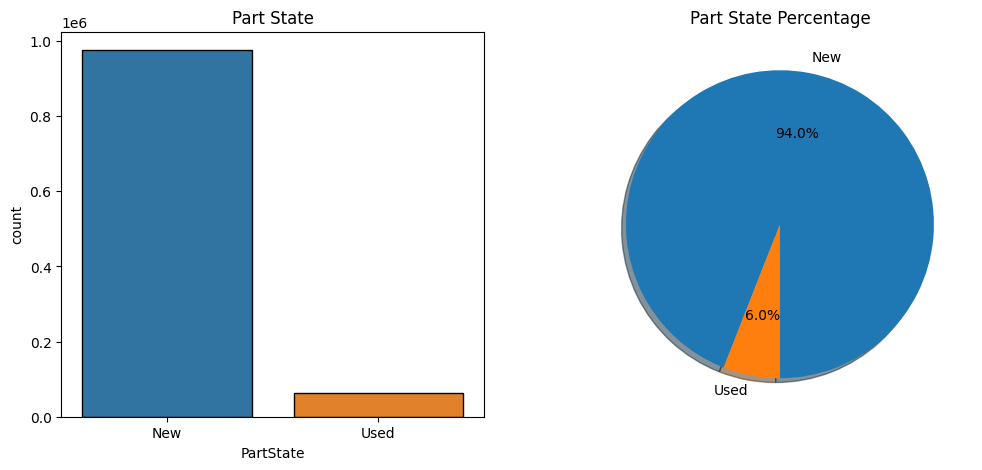

In [11]:
#Finding out the distribution of "PartState" through visualization

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='PartState',data=df_old,ec="Black")
plt.title("Part State")
plt.subplot(1,2,2)
labels =df_old['PartState'].value_counts(sort = True).index
sizes = df_old['PartState'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Part State Percentage',size = 12)
plt.show()

**Insights**
- The New parts clearly dominates the used parts in numbers
- Most people opt for choosing new parts for their vehicles
- Only a slight number of people go for used parts due to the legitimacy and life expectancy of the used parts

### 4th plot insights 

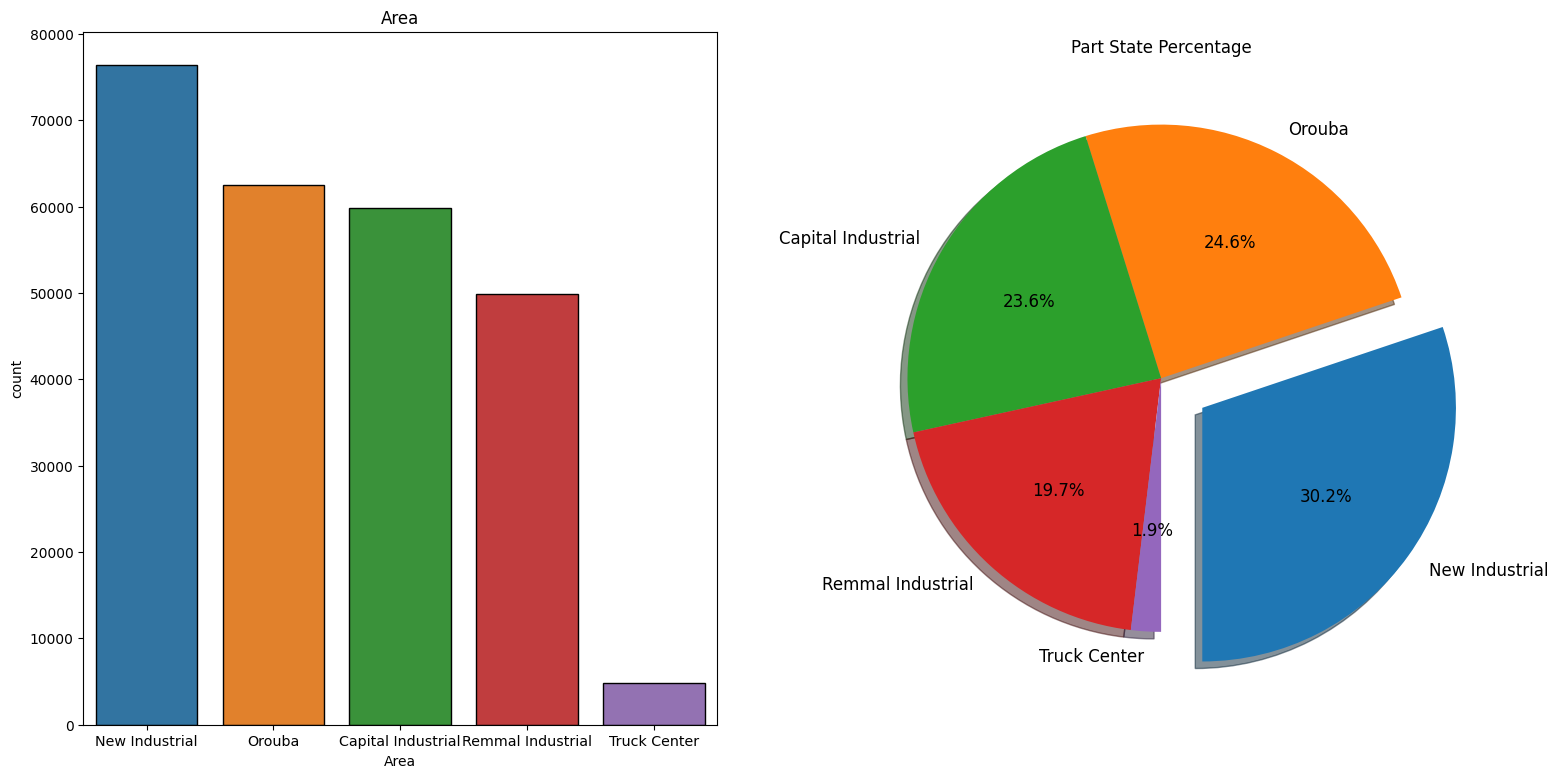

In [57]:
#Finding out the distribution of "PartState" through visualization

plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
order = ['New Industrial','Orouba','Capital Industrial','Remmal Industrial','Truck Center']
sns.countplot(x='Area',data=df,ec="Black",order=order)
plt.title("Area")
plt.xticks(size=10.3)
plt.subplot(1,2,2)
labels =df['Area'].value_counts(sort = True).index
sizes = df['Area'].value_counts(sort = True)
explode = (0.2, 0, 0, 0,0)
plt.pie(sizes,labels=labels,explode=explode,autopct='%1.1f%%', shadow=True, startangle=270,textprops={'fontsize': 12})
plt.title('Part State Percentage',size = 12)
plt.show()

**Insights**
- New Industrial is the most commonly visited city center in
- Truck Location is a less visited center since it only caters to trucks. 
- The Capital Industrial Area and Orouba have almost the same percentage of visitors in the city.

### 5th Plot Insights

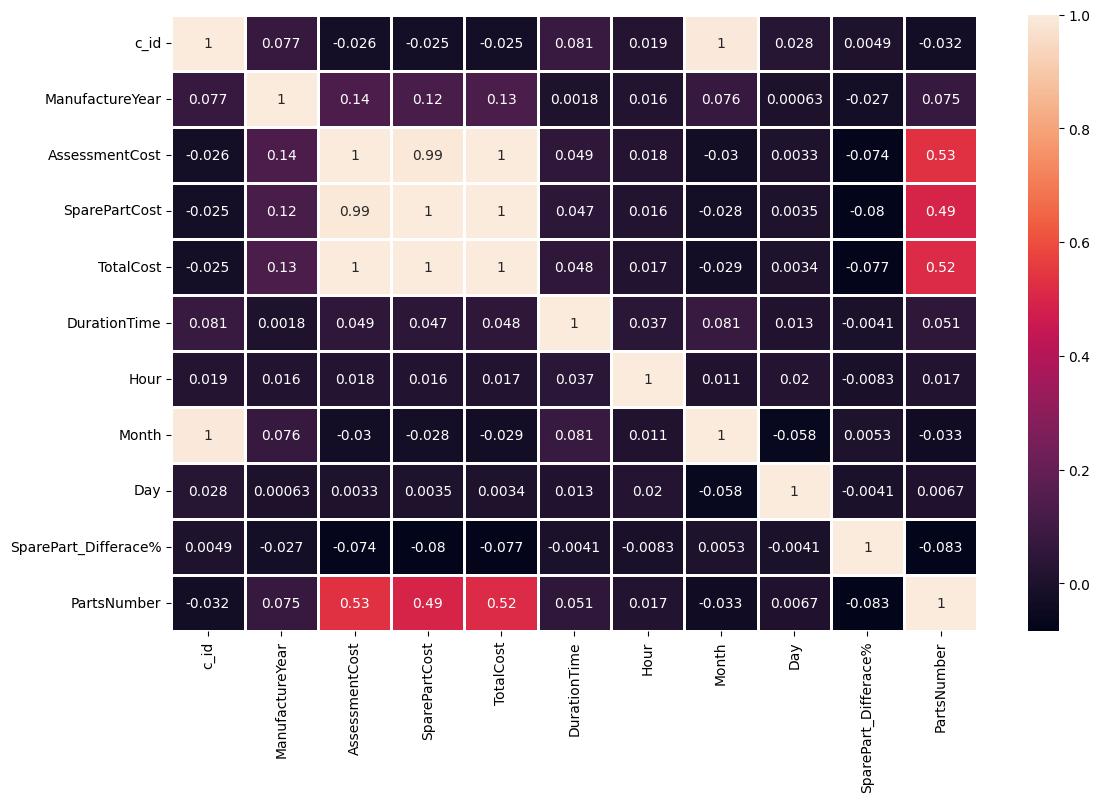

In [13]:
#Finding the correlation among the variables containing INT values using heatmap
plt.figure(figsize=(13, 8))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,linewidth=.8, cmap="rocket");

**Insights**
- Total Cost it has Data leakage to Assessment Cost and Spare Part Cost
- The day of the week has a very weak realtion with the ManufactureYear
- Assessment Cost and Total Cost have a negative relationship with the month of the year

### 6th Plot Insight

[Text(0.5, 1.0, 'Part State and Payment Type')]

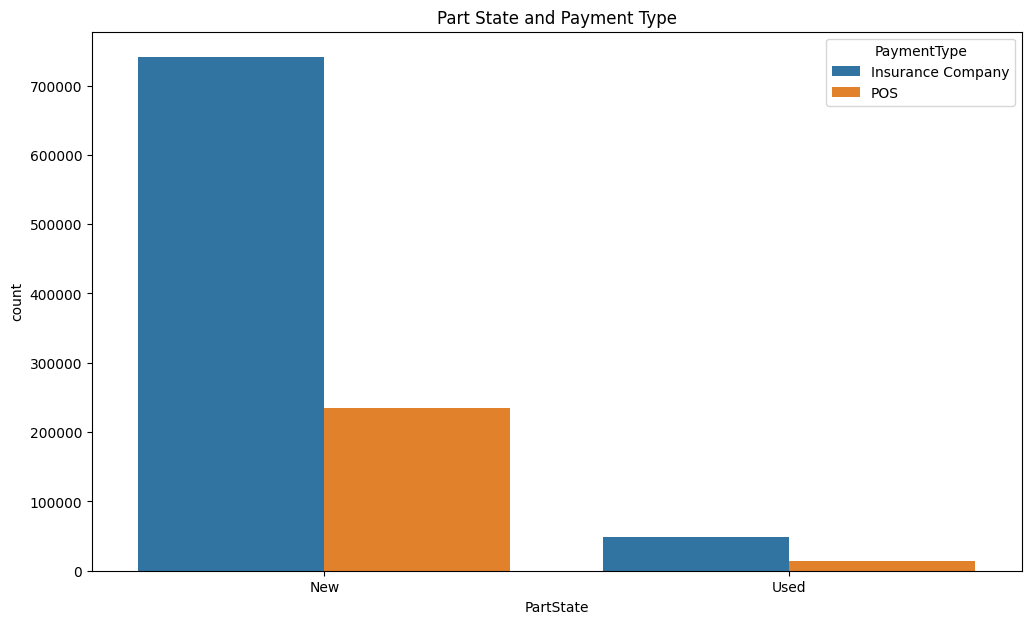

In [14]:
#Now comparing variables with each other
plt.figure(figsize=(12,7))
sns.countplot(x='PartState',hue='PaymentType',data=df_old).set(title='Part State and Payment Type')

**Insights**
- There's a huge difference between payment type when it comes to new parts. Insurance company covers most of them
- A very small difference can be seen when it comes to used parts. Although, the insurance company are more likely to cover the expense of used parts as well but there isn't a big difference when compared to POS  
- We can conclude by saying that no matter what the state of the parts is, Insurance Company are more likely to pay for them

### 7th plot insights 

[Text(0.5, 1.0, 'AssessmentEvaluation and Area')]

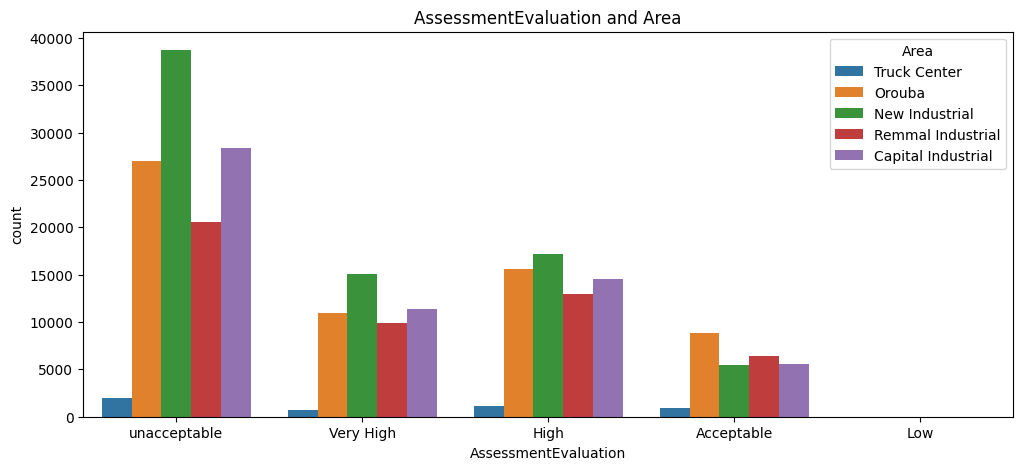

In [15]:
#Comparing Month with Area
plt.figure(figsize=(12, 5))
order = ['unacceptable','Very High','High','Acceptable','Low']
sns.countplot(x='AssessmentEvaluation'
              ,hue='Area'
              ,data=df  
              ,order=order).set(title='AssessmentEvaluation and Area')

**Insights**
- We can observe that the Orouba is the Highest Area have an Acceptable Evaluation
- We can observe that the New Industrial is the Highest Area have an unacceptable Evaluation.
- We can observe that there is no gap between areas in High Assessment Evaluation except Truck Center.

In [16]:
# df['AssessmentEvaluation'].value_counts()

### 8th plot insights 

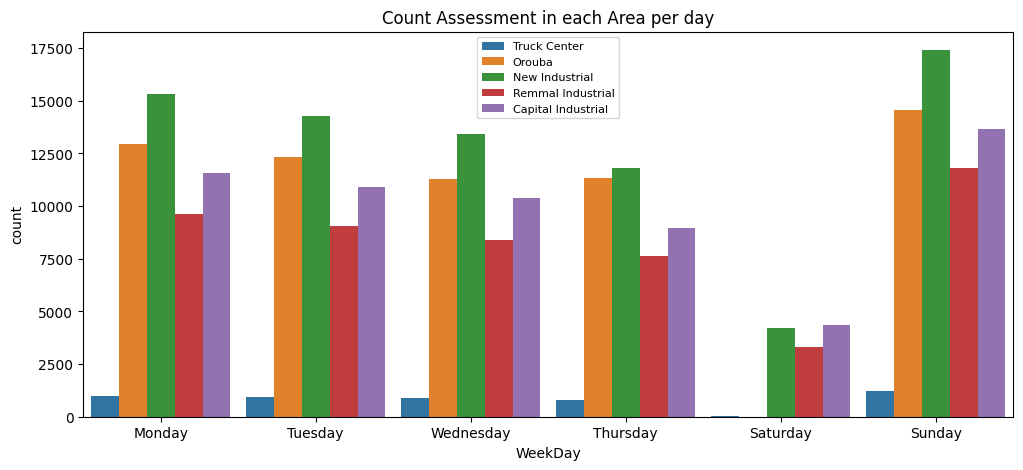

In [17]:
#Finding out the distribution of "WeekDay" through visualization
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='WeekDay', y=None, hue='Area',saturation=0.75, width=0.9).set(title='Count Assessment in each Area per day')
plt.legend(loc=0, prop={'size': 8})

**Insights**
- We can observe that Saturday is the least crowded, and it can be noted that the Orouba Center does not operate on Saturday.
- We can observe that Sunday is the busiest day.
- We can observe that the New Industrial center is the busiest on most days.
- There is a clear difference between the number of accidents that occur on weekdays and weekend. Weekdays are more dangerous for driving as compared to on the weekend

## 9th Plot Insight

<AxesSubplot:xlabel='Month', ylabel='count'>

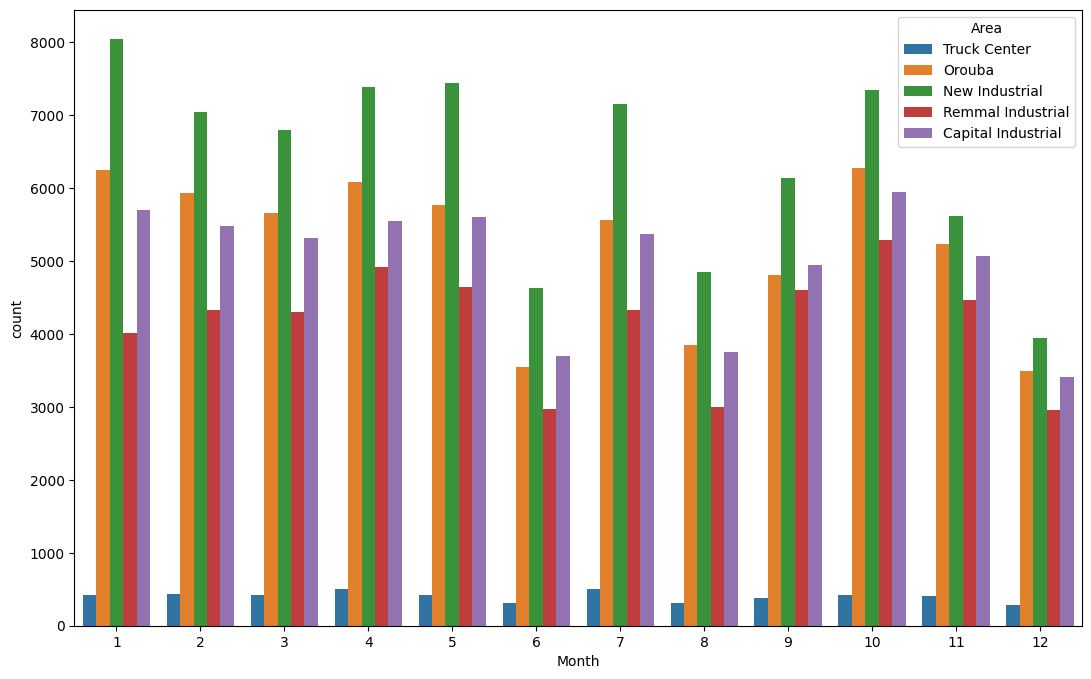

In [18]:
#Comparing Month with Area
plt.figure(figsize=(13, 8))
sns.countplot(x='Month',hue='Area',data=df)

**Insights**
- January is the Highest month in car assessment. Whereas, december is the lowest month when compared to the other months
- The New Industrial is the most center used for all months


## 10th Plot Insight

[Text(0.5, 1.0, 'Time Evaluation and Area')]

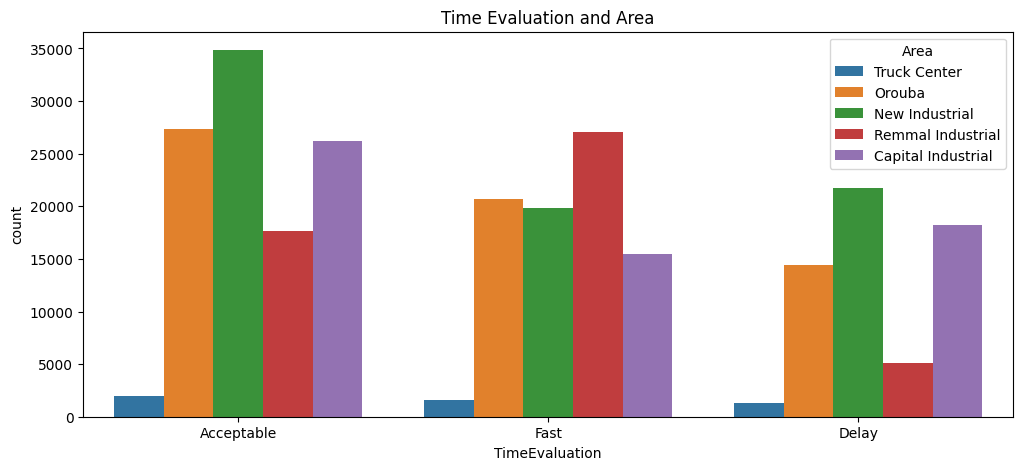

In [19]:
#Comparing Month with Area
plt.figure(figsize=(12,5))
sns.countplot(x='TimeEvaluation',hue='Area',data=df).set(title='Time Evaluation and Area')

**Insights**
- The Remmal Industrial is the Fastest Time Evaluation between the Areas
- The Orouba have good Time Evaluation after the Remmal Industrial 
- New Industrial has the highest number of Time Evaluation Delay

## 11th Plot Insight

In [20]:
tmp_df = pd.DataFrame()
tmp_df['Capital Industrial'] = ( df[df['Area'] == 'Capital Industrial'] [['Area','DurationTime']].describe() )
tmp_df['New Industrial'] = ( df[df['Area'] == 'New Industrial'] [['Area','DurationTime']].describe() )
tmp_df['Orouba'] = ( df[df['Area'] == 'Orouba'] [['Area','DurationTime']].describe())
tmp_df['Remmal Industrial'] = ( df[df['Area'] == 'Remmal Industrial'] [['Area','DurationTime']].describe())
tmp_df['Truck Center'] = ( df[df['Area'] == 'Truck Center'] [['Area','DurationTime']].describe())
index = df[(df['DurationTime'] == 0)]['Area'].value_counts().index
count =  df[(df['DurationTime'] == 0)]['Area'].value_counts().values
tmp_df

,Capital Industrial,New Industrial,Orouba,Remmal Industrial,Truck Center
count,59845.000000,76431.000000,62459.000000,49835.000000,4826.000000
mean,23.869112,21.287239,20.800157,12.927200,29.428098
std,41.937800,23.346322,30.162487,21.542284,83.646757
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,10.000000,10.000000,9.000000,6.000000,9.000000
50%,16.000000,16.000000,14.000000,10.000000,14.000000
75%,26.000000,24.000000,22.000000,15.000000,23.750000
max,1438.000000,1428.000000,1316.000000,1401.000000,1416.000000


[Text(0.5, 1.0, 'Assessment has duration less than minute in the Area'),
 Text(0.5, 0, 'Areas'),
 Text(0, 0.5, 'count')]

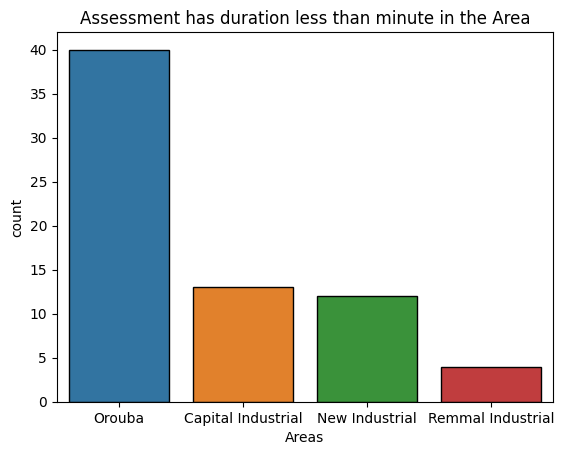

In [21]:
sns.barplot(df,x=index,y=count,ec='Black').set(title='Assessment has duration less than minute in the Area',xlabel='Areas', ylabel='count')

In [22]:
df[(df['DurationTime'] == 0)].Month.value_counts()

1    51
9    18
Name: Month, dtype: int64

In [23]:
df[(df['DurationTime'] == 0) & (df['Month'] == 1)].Area.value_counts()

Orouba                22
Capital Industrial    13
New Industrial        12
Remmal Industrial      4
Name: Area, dtype: int64

In [24]:
df[(df['DurationTime'] == 0)  & (df['Month'] == 1)].Day.value_counts()

29    51
Name: Day, dtype: int64

**Insights**
- on the 29th of January, we noticed that there were 51 assessment cases that were entered into the system in less than a minute. It is worth noting that this happened in more than one center. 
- We expect that the cause of the problem is a defect in the previous system, which led to entering the data of that next day

In [25]:
df[(df['DurationTime'] == 0) & (df['Month'] == 9)].Area.value_counts()

Orouba    18
Name: Area, dtype: int64

In [26]:
df[(df['DurationTime'] == 0) & (df['Month'] == 9)].Day.value_counts()

24    16
25     2
Name: Day, dtype: int64

 **Insights**
- Note that on the 24th, 25th of September, we noticed that there were estimated cases that were entered into the system within less than a minute, and that they are all present in the Orouba Center only.

-  We will remove the recordes that have duration time zero in ML models

# 12th Plot Insight

In [27]:
Top10_normal = df_normal.CarBrand.value_counts().head(10).index
Top10_Luxury = df_Luxury.CarBrand.value_counts().head(10).index

In [28]:
df_normal_10 = df_normal[df_normal['CarBrand'].isin(Top10_normal)]
df_Luxury_10= df_Luxury[df_Luxury['CarBrand'].isin(Top10_Luxury)]

In [29]:
tmp_normal_avg = pd.DataFrame()
tmp_normal_avg['Toyota'] = (df_normal_10[df_normal_10['CarBrand'] == 'Toyota'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_normal_avg['Hyundai'] = (df_normal_10[df_normal_10['CarBrand'] == 'Hyundai'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_normal_avg['Ford'] = (df_normal_10[df_normal_10['CarBrand'] == 'Ford'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_normal_avg['Nissan'] = (df_normal_10[df_normal_10['CarBrand'] == 'Nissan'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_normal_avg['Chevrolet'] = (df_normal_10[df_normal_10['CarBrand'] == 'Chevrolet'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_normal_avg['Kia'] = (df_normal_10[df_normal_10['CarBrand'] == 'Kia'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_normal_avg['Honda'] = (df_normal_10[df_normal_10['CarBrand'] == 'Honda'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_normal_avg['GMC'] = (df_normal_10[df_normal_10['CarBrand'] == 'GMC'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_normal_avg['Mazda'] = (df_normal_10[df_normal_10['CarBrand'] == 'Mazda'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_normal_avg['Isuzu'] = (df_normal_10[df_normal_10['CarBrand'] == 'Isuzu'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_normal_avg = tmp_normal_avg.transpose().sort_values('SparePartCost',ascending=False)

In [30]:
px.bar(tmp_normal_avg
       ,x=tmp_normal_avg.index
       ,y=tmp_normal_avg['SparePartCost']
       ,color=tmp_normal_avg.index
       ,title="Normal car brand and Average Spare Part Cost"
       ,labels={'index':'Normal car brand','SparePartCost':'Average Spare Part Cost'})

 **Insights**
- We can observe that GMC is the highest Spare part cost and the Isuzu is the lowest one.

## 13th Plot Insight

In [31]:
tmp_normal = pd.DataFrame()
tmp_normal['Toyota'] = (df_normal_10[df_normal_10['CarBrand'] == 'Toyota'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_normal['Hyundai'] = (df_normal_10[df_normal_10['CarBrand'] == 'Hyundai'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_normal['Ford'] = (df_normal_10[df_normal_10['CarBrand'] == 'Ford'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_normal['Nissan'] = (df_normal_10[df_normal_10['CarBrand'] == 'Nissan'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_normal['Chevrolet'] = (df_normal_10[df_normal_10['CarBrand'] == 'Chevrolet'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_normal['Kia'] = (df_normal_10[df_normal_10['CarBrand'] == 'Kia'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_normal['Honda'] = (df_normal_10[df_normal_10['CarBrand'] == 'Honda'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_normal['GMC'] = (df_normal_10[df_normal_10['CarBrand'] == 'GMC'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_normal['Mazda'] = (df_normal_10[df_normal_10['CarBrand'] == 'Mazda'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_normal['Isuzu'] = (df_normal_10[df_normal_10['CarBrand'] == 'Isuzu'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_normal = tmp_normal.transpose().sort_values('SparePartCost',ascending=False)

In [32]:
px.bar(tmp_normal
       ,x=tmp_normal.index
       ,y=tmp_normal['SparePartCost']
       ,color=tmp_normal_avg.index
       ,title="Count of normal car brand"
       ,labels={'index':'Normal car brand','SparePartCost':'Count'})

 **Insights**
- We can observe that Toyota and Hyundai are highly used in Riyadh in the Normal car brand.

## 14th Plot Insight

In [33]:
tmp_Luxury_avg = pd.DataFrame()
tmp_Luxury_avg['Lexus'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'Lexus'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_Luxury_avg['Mercedes'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'Mercedes'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_Luxury_avg['BMW'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'BMW'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_Luxury_avg['Hyundai'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'Hyundai'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_Luxury_avg['Audi'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'Audi'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_Luxury_avg['Cadillac'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'Cadillac'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_Luxury_avg['Volvo'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'Volvo'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_Luxury_avg['Land Rover'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'Land Rover'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_Luxury_avg['Porsche'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'Porsche'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_Luxury_avg['Jaguar'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'Jaguar'] [['CarBrand','SparePartCost']].mean(numeric_only=True))
tmp_Luxury_avg = tmp_Luxury_avg.transpose().sort_values('SparePartCost',ascending=False)

In [34]:
px.bar(tmp_Luxury_avg
       ,x=tmp_Luxury_avg.index
       ,y=tmp_Luxury_avg['SparePartCost']
       ,color=tmp_Luxury_avg.index
       ,title="Luxury Car brand and Average Spare Part Cost"
       ,labels={'index':'Luxury Car Brand','SparePartCost':'Average Spare Part Cost'})

 **Insights**
- We can observe that Land Rover is the highest Spare part cost and the Lexus is the lowest one.

## 15th Plot Insight

In [35]:
tmp_Luxury = pd.DataFrame()
tmp_Luxury['Lexus'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'Lexus'][['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_Luxury['Mercedes'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'Mercedes'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_Luxury['BMW'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'BMW'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_Luxury['Hyundai'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'Hyundai'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_Luxury['Audi'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'Audi'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_Luxury['Cadillac'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'Cadillac'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_Luxury['Volvo'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'Volvo'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_Luxury['Land Rover'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'Land Rover'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_Luxury['Porsche'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'Porsche'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_Luxury['Jaguar'] = (df_Luxury_10[df_Luxury_10['CarBrand'] == 'Jaguar'] [['CarBrand','SparePartCost']].count(numeric_only=True))
tmp_Luxury = tmp_Luxury.transpose().sort_values('SparePartCost',ascending=False)

In [36]:
px.bar(tmp_Luxury
       ,x=tmp_Luxury.index
       ,y=tmp_Luxury['SparePartCost']
       ,color=tmp_Luxury.index
       ,title="Count Luxury Car brand"
       ,labels={'index':'Luxury Car Brand','SparePartCost':'Count'})

 **Insights**
- We can observe that Lexus is highly used in Riyadh and the Jauger is the lowest used in the Luxury car brand.


## 16th Plot Insight

In [37]:
Top5_CarMade = df.CarMade.value_counts().head(5).index
df_top5 = df[df['CarMade'].isin(Top5_CarMade)]

In [38]:
df_CarMade = df_top5.groupby('CarMade').count().reset_index().sort_values('c_id',ascending=False)

In [39]:
px.bar(df_CarMade,
       x='CarMade',y='c_id',color='CarMade',title='Top 5 CarMade',
      labels={'c_id':'count'} )

**Insights**
- We can observe that Japanese cars is the most cars use in Riyadh
- We can observe that French car is the lowest use in Riyadh

## 17th Plot Insight

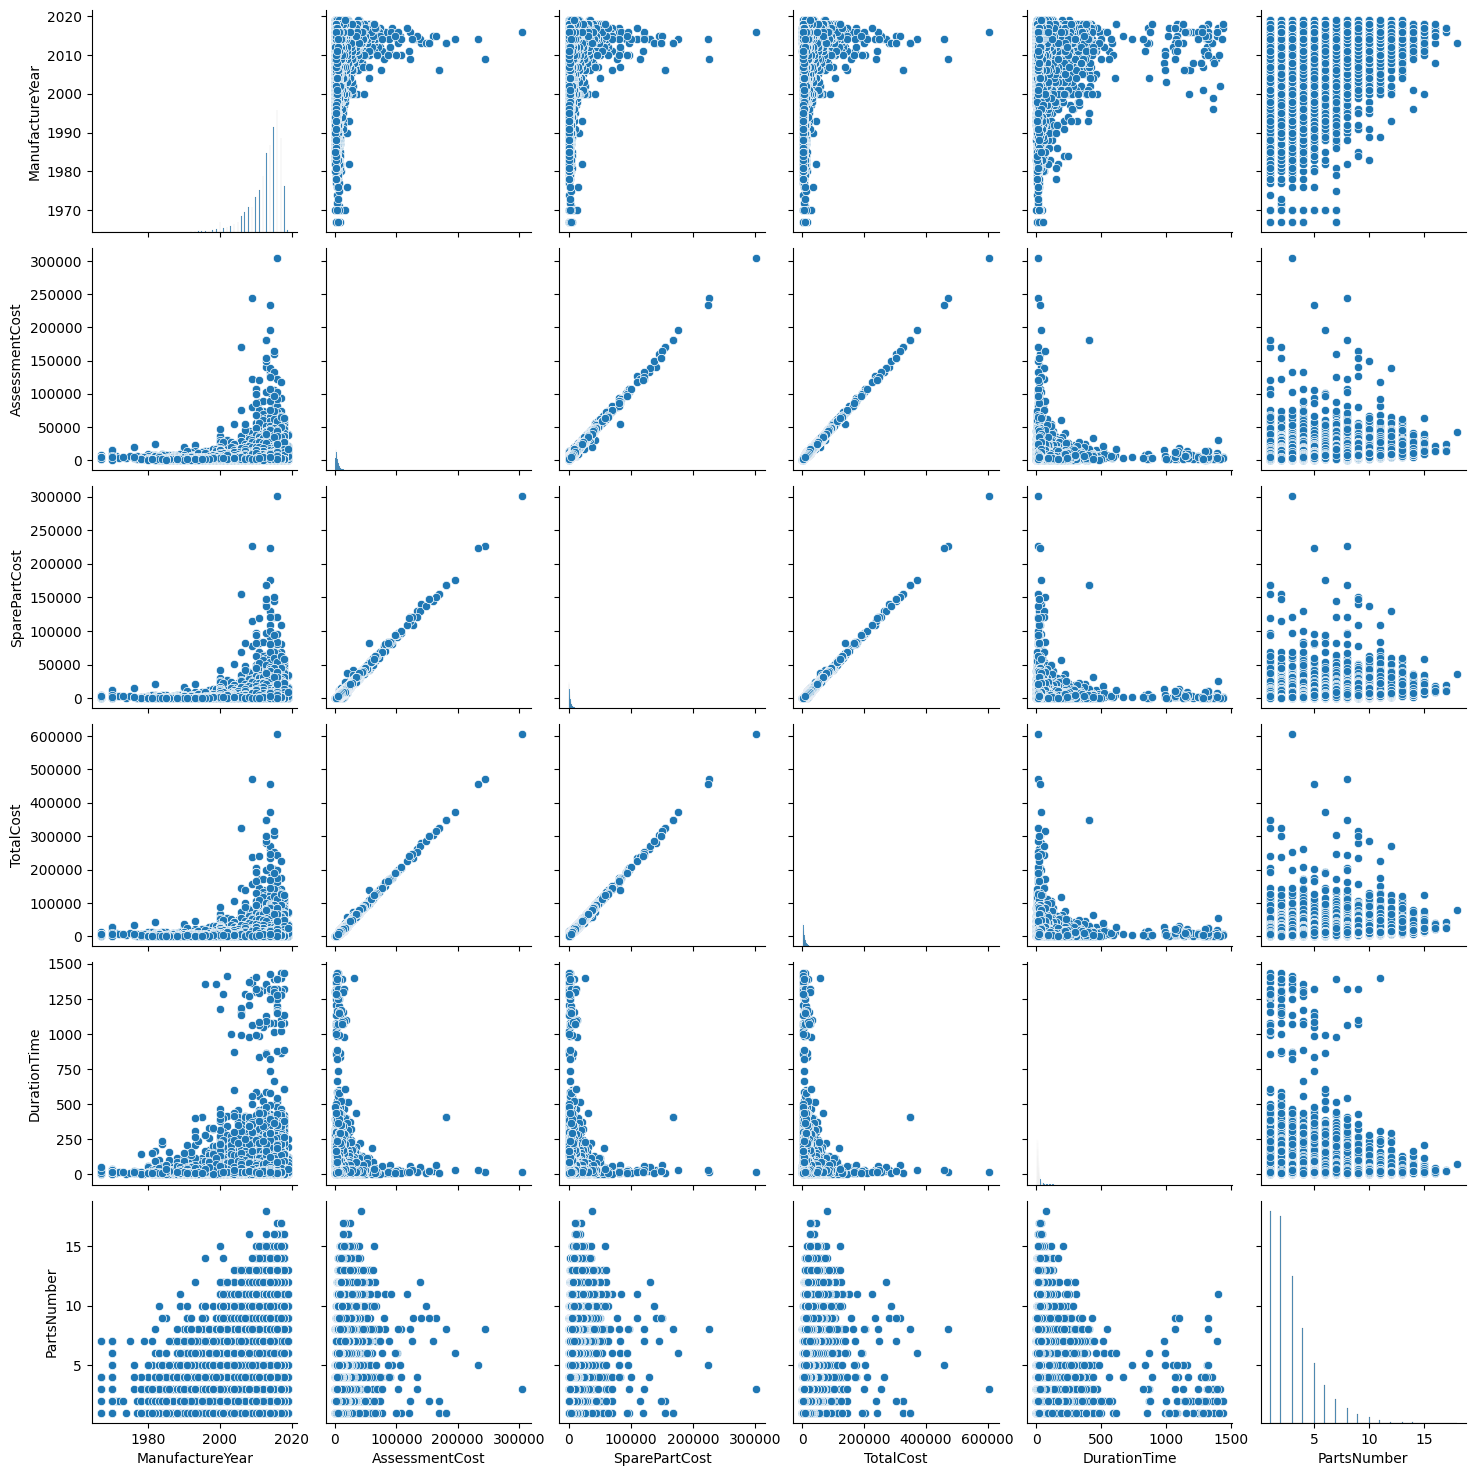

In [40]:
tmp = df.drop(columns=['c_id','Hour','Month','Day','SparePart_Differace%'])
sns.pairplot(tmp)

**Insights**
- We can observe that when the ManufactureYear is increased the AssessmentCost will increase 

# 18th Plot Insight

In [41]:
px.box(df_Luxury,
      y='TotalCost',
      title='TotalCost for Luxury car')

In [42]:
# df_Luxury[df_Luxury['TotalCost'] >= 600000]

**Insights**
- As we can see, there are many outliers in 'TotalCost' in Luxury cars. we will remove it in the ML models
- The maximum total cost for a luxury car is 605.02K
- Any cost above 42236 is the outlier
- The minimum total cost for a luxury car is 525
- the median is 10.8K

## 19th Plot Insight

In [43]:
px.box(df_normal,
      y='TotalCost',
      title='TotalCost for normal car')

In [44]:
# df_normal[df_normal['TotalCost']>240000]

**Insights**
- As we can see, there are many outliers in 'TotalCost' in normal cars. we will remove it in the ML models
- The maximum total cost for a normal car is 240.8K
- Any cost above 18.03K is the outlier
- the median is 4972